# Importação das bibliotecas necessárias

In [1]:


import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.metrics import confusion_matrix

In [2]:
# Vamos apenas verificar se temos uma GPU para treinar a(s) rede(s)
is_gpu_available = tf.config.list_physical_devices('GPU')
print('GPU is', 'AVAILABLE' if is_gpu_available else 'NOT AVAILABLE')

GPU is NOT AVAILABLE


# Funções auxiliares

In [3]:
def plot_from_sample(samples, labels=None):
    for i in range(len(samples)):
        sample = samples[i]
        plt.subplot(1, len(samples), i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(sample.reshape(28, 28), cmap=plt.cm.binary)
        if labels is not None:
            plt.xlabel(labels[i])

# **Passo 1**: Obter dados

Neste passo, vamos obter o conjunto de dados e separá-lo em dados de teste e em dados de treino.

In [4]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

O objectivo é usar as imagens como entrada na rede neuronal e prever o dígito mais provável.

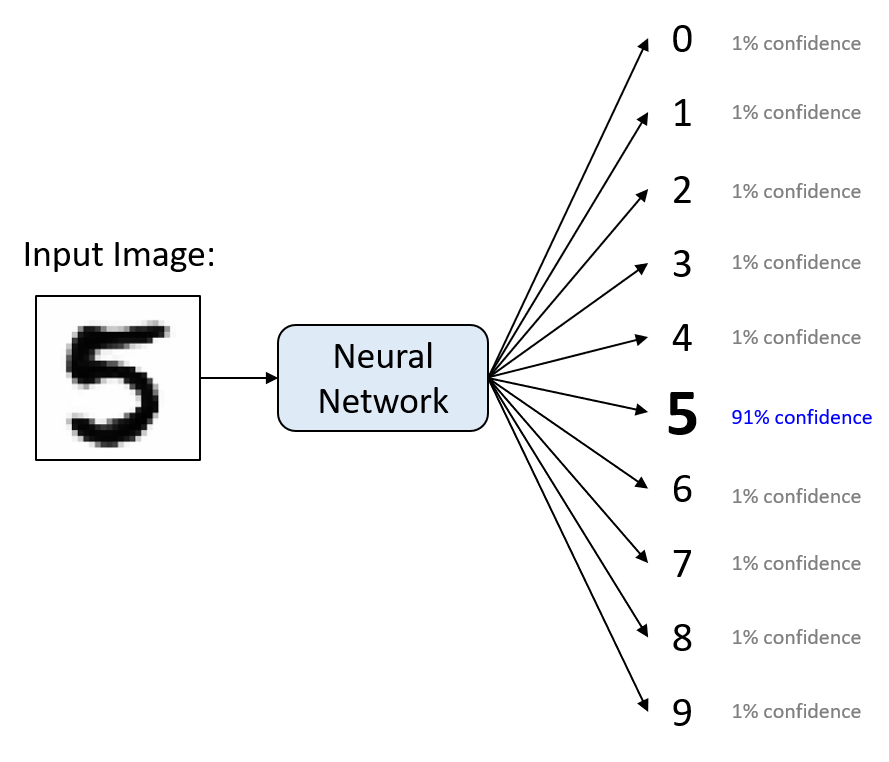

## Vamos explorar um pouco os dados

## Variável ``X``

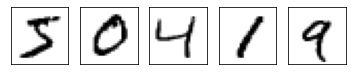

In [5]:
plot_from_sample(X_train[:5])

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train.max(), X_train.min()

(255, 0)

Cada linha do ``X_train`` corresponde a uma imagem com 28x28 pixéis. O conjunto de dados tem um total de 6 000 exemplos.

É importante notar que todas as imagens estão numa escala cinzenta (caso contrário, teríamos para cada píxel 3 dimensões). Todos os valores em X (pixéis) variam entre 0 e 255.

## Variável ``Y``

In [8]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# **Passo 2**: Pré-processamento dos dados

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# **Passo 3**: Preparação dos dados

In [10]:
X_train = X_train.reshape((len(X_train), 784))
X_test = X_test.reshape((len(X_test), 784))

# **Passo 4**: Inicialização do modelo

In [11]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(784,)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

**Porquê 784?**

In [12]:
model.input_shape

(None, 784)

In [13]:
model.output_shape

(None, 10)

## Compilar o modelo

In [14]:
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Vamos confirmar se era realmente isto o pretendido...

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


# **Passo 5**: Treino do modelo

In [16]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, min_delta=0.1)

In [17]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, callbacks=[callback], validation_split=0.3)

Epoch 1/50
657/657 [==============================] - 2s 3ms/step - loss: 1.1687 - accuracy: 0.6988 - val_loss: 0.6275 - val_accuracy: 0.8471
Epoch 2/50
657/657 [==============================] - 2s 3ms/step - loss: 0.5328 - accuracy: 0.8650 - val_loss: 0.4467 - val_accuracy: 0.8807
Epoch 3/50
657/657 [==============================] - 2s 3ms/step - loss: 0.4248 - accuracy: 0.8859 - val_loss: 0.3887 - val_accuracy: 0.8930
Epoch 4/50
657/657 [==============================] - 2s 3ms/step - loss: 0.3790 - accuracy: 0.8948 - val_loss: 0.3595 - val_accuracy: 0.8982
Epoch 5/50
657/657 [==============================] - 2s 3ms/step - loss: 0.3525 - accuracy: 0.9016 - val_loss: 0.3397 - val_accuracy: 0.9038
Epoch 6/50
657/657 [==============================] - 2s 3ms/step - loss: 0.3335 - accuracy: 0.9055 - val_loss: 0.3242 - val_accuracy: 0.9086
Epoch 7/50
657/657 [==============================] - 2s 3ms/step - loss: 0.3190 - accuracy: 0.9091 - val_loss: 0.3125 - val_accuracy: 0.9121
Epoch 

### Curva da função de perda de treino

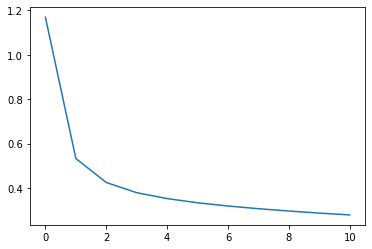

In [18]:
plt.plot(history.history['loss'])

### Curva da função de perda de validação

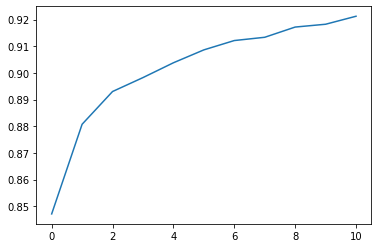

In [19]:
plt.plot(history.history['val_accuracy'])

# **Passo 6**: Avaliação do modelo

In [20]:
train_loss, train_acc = model.evaluate(X_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2750 - accuracy: 0.9215


In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2690 - accuracy: 0.9250


In [22]:
y_train_prob = model.predict(X_train)  # cálculo das probabilidades
y_train_pred = y_train_prob.argmax(axis=1)  # cálculo da class mais provável

y_test_prob = model.predict(X_test)  # cálculo das probabilidades
y_test_pred = y_test_prob.argmax(axis=1)  # cálculo da class mais provável

## Matriz de confusão

In [23]:
confusion_matrix(y_train, y_train_pred)

array([[5739,    0,   17,   12,   12,   37,   41,    5,   55,    5],
       [   1, 6532,   36,   25,    7,   30,    8,   19,   80,    4],
       [  41,   51, 5360,   82,  100,   15,   93,   81,  112,   23],
       [  23,   28,  139, 5435,    5,  216,   31,   67,  122,   65],
       [  15,   29,   27,    7, 5465,    4,   74,   14,   32,  175],
       [  81,   25,   44,  159,   51, 4708,  143,   31,  123,   56],
       [  39,   16,   38,    1,   59,   62, 5673,    2,   28,    0],
       [  27,   39,   87,   21,   63,   10,    2, 5860,   14,  142],
       [  33,  121,   60,  127,   26,  126,   63,   13, 5212,   70],
       [  42,   34,   23,   85,  201,   32,    4,  164,   58, 5306]])

In [24]:
confusion_matrix(y_test, y_test_pred)

array([[ 961,    0,    2,    1,    0,    4,    8,    1,    3,    0],
       [   0, 1106,    3,    2,    0,    2,    4,    2,   16,    0],
       [  12,    8,  933,   13,   13,    0,   15,   11,   23,    4],
       [   1,    1,   22,  921,    0,   26,    2,   13,   17,    7],
       [   2,    3,    4,    2,  927,    0,    9,    2,    6,   27],
       [  12,    3,    5,   31,    6,  771,   18,    7,   34,    5],
       [  15,    3,    4,    0,   13,    6,  913,    1,    3,    0],
       [   3,    9,   24,    7,    7,    0,    0,  951,    2,   25],
       [  11,    7,    4,   20,    9,   20,   14,   10,  870,    9],
       [  11,    7,    2,   10,   45,    8,    1,   22,    6,  897]])

# Exercício

Crie uma rede neuronal capaz de predizer, através de imagens 28x28, qual a categoria de vestuário que consta da imagem. O conjunto de dados é aplamente conhecido por _Fashion MNIST_, e está diponível em [https://www.kaggle.com/zalando-research/fashionmnist](https://https://www.kaggle.com/zalando-research/fashionmnist).

Alternativamente, o conjunto de dados pode ser carregado da seguinte forma:
```python
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
```

A rede neuronal deverá possuir 3 camadas ocultas (com 50, 25, 25 unidades), com a função de activação ``sigmoid``.

Implemente paragem atenticipada no conjunto de dados de validação, com um valor de ``patience`` e de ``min_delta`` escolhidos por si. Os dados de validação deverão consistir de 20% dos dados de treino. 

Para treinar a rede, utilize um algoritmo de optimização **diferente** do gradiente descendente estocástico. Defina  ``epochs=50`` e ``batch_size=64``. 

Avalie o modelo e compare-o com um modelo com menos camadas ocultas (por exemplo, 2 camadas ocultas).